In [18]:
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb

dataset="cleaned_NI.csv"

In [19]:
from sklearn.metrics import mean_squared_log_error,r2_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    r2 = r2_score(y_test, predictions)
    smape = 100 * np.mean(2 * np.abs(predictions - y_test) / (np.abs(y_test) + np.abs(predictions)))
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, R2: {r2:.2f}, sMAPE: {smape:.2f}%")
    return predictions

In [20]:
print("Step 1: Loading and preprocessing data...")  # Progress loader

# Load and preprocess the data
data = pd.read_csv(dataset, parse_dates=['Datetime'], index_col='Datetime')
data = data.sort_index()  # Ensure data is sorted by time

print("Step 2: Creating lag features and target variable...")  # Progress loader

# Create lag features for supervised learning
def create_features_and_target(df, target_column, lags):
    df = df.copy()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[target_column].shift(lag)
    # Target is the next 24 hours (for 1 day forecasting)
    df['target'] = df[target_column].shift(-24)
    return df

# Add time-based features (hour, day of week)
def add_time_features(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    return df

# Feature Engineering
lags = 24  # Last 24 hours as input
data = create_features_and_target(data, 'NI_MW', lags)
data = add_time_features(data).dropna()

print("Step 3: Splitting data into training and testing sets...")  # Progress loader

# Train-test split
test_period = 365 * 24  # Last 1 year for testing
train_data = data.iloc[:-test_period]
test_data = data.iloc[-test_period:]

X_train = train_data.drop(columns=['NI_MW', 'target'])
y_train = train_data['target']
X_test = test_data.drop(columns=['NI_MW', 'target'])
y_test = test_data['target']

print(f"Training data size: {X_train.shape[0]} rows")
print(f"Testing data size: {X_test.shape[0]} rows")


Step 1: Loading and preprocessing data...
Step 2: Creating lag features and target variable...
Step 3: Splitting data into training and testing sets...
Training data size: 49642 rows
Testing data size: 8760 rows


Step 4: Training the XGBoost model...
XGBoost model training complete!
Step 5: Generating predictions with XGBoost...
Step 6: Evaluating the XGBoost model...
XGBoost Evaluation Metrics -> RMSE: 924.02, MAE: 595.93
Step 7: Visualizing predictions (XGBoost)...


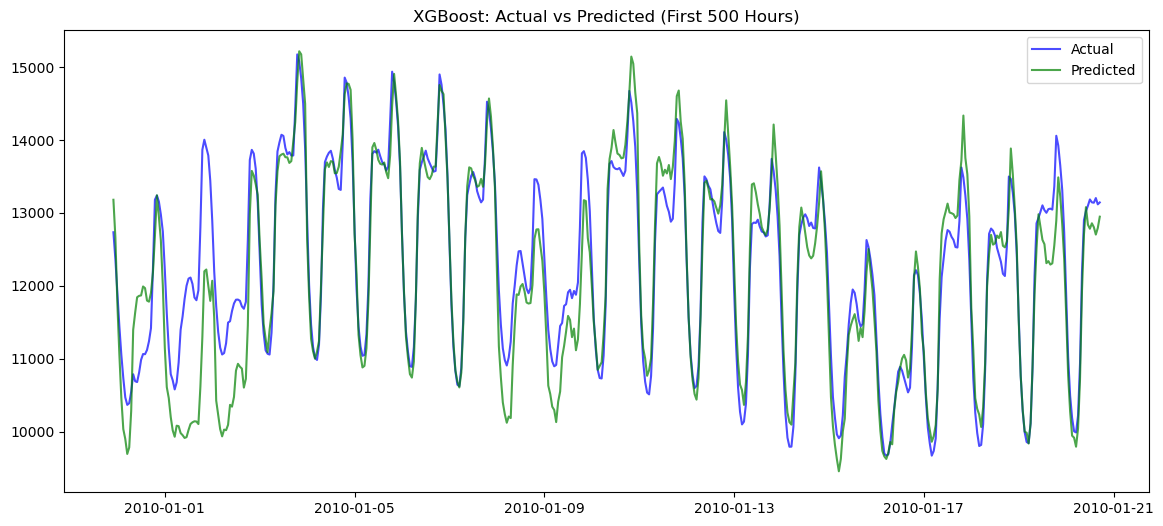

RMSE: 924.02, MAE: 595.93, MAPE: 4.76%, R2: 0.86, sMAPE: 4.76%


array([13180.494, 12659.937, 11754.123, ..., 12226.901, 11619.744,
       10684.392], dtype=float32)

In [21]:
print("Step 4: Training the XGBoost model...")  # Progress loader

# Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

print("XGBoost model training complete!")

# Predictions
print("Step 5: Generating predictions with XGBoost...")  # Progress loader
xgb_predictions = xgb_model.predict(X_test)

i=X_train
j=X_test
a=y_train
b=y_test

# Evaluation
print("Step 6: Evaluating the XGBoost model...")  # Progress loader
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f"XGBoost Evaluation Metrics -> RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}")

# Visualization
print("Step 7: Visualizing predictions (XGBoost)...")  # Progress loader
plt.figure(figsize=(14, 6))
plt.plot(y_test.index[:500], y_test[:500], label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index[:500], xgb_predictions[:500], label='Predicted', color='green', alpha=0.7)
plt.title('XGBoost: Actual vs Predicted (First 500 Hours)')
plt.legend()
plt.show()
evaluate_model(xgb_model,X_test,y_test)


In [22]:
y_test

Datetime
2009-12-30 22:00:00    12735.0
2009-12-30 23:00:00    12363.0
2009-12-31 00:00:00    11906.0
2009-12-31 01:00:00    11450.0
2009-12-31 02:00:00    11056.0
                        ...   
2010-12-30 20:00:00    11585.0
2010-12-30 21:00:00    11243.0
2010-12-30 22:00:00    10825.0
2010-12-30 23:00:00    10511.0
2010-12-31 00:00:00    10042.0
Name: target, Length: 8760, dtype: float64

In [23]:
for x in xgb_predictions:
    print(x)

13180.494
12659.937
11754.123
11065.109
10464.968
10035.374
9900.486
9695.059
9784.665
10288.633
11396.46
11632.748
11844.032
11863.118
11869.084
11991.502
11968.745
11797.731
11783.112
11904.149
12184.531
12685.042
13241.963
12951.086
12623.965
12001.612
11150.697
10611.108
10461.052
10200.571
10018.642
9931.023
10082.432
10075.753
9981.359
9952.817
9914.658
9925.687
10023.15
10105.6455
10129.319
10142.856
10140.068
10104.827
10617.9
11299.571
12199.898
12224.083
12002.822
11794.181
12069.979
11559.735
10426.691
10235.248
10035.836
9936.14
10028.828
10020.922
10093.8125
10368.34
10343.638
10477.459
10836.98
10931.088
10891.477
10865.232
10605.317
10725.511
11457.047
12984.213
13576.427
13513.7705
13393.144
13248.4375
12610.235
12095.988
11477.388
11275.015
11090.28
11396.7295
11623.615
11927.101
13106.25
13573.483
13777.633
13800.509
13812.227
13764.625
13762.06
13685.792
13710.485
13980.763
14247.068
14793.961
15216.745
15174.258
14826.207
14495.114
12637.165
11855.886
11272.722
1110

In [24]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,hour,day_of_week
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-05-02 01:00:00,9318.0,9873.0,9988.0,9677.0,9384.0,9269.0,9349.0,9329.0,9465.0,9540.0,...,8267.0,8082.0,7806.0,7828.0,7917.0,8183.0,8570.0,9198.0,1,6
2004-05-02 02:00:00,8697.0,9318.0,9873.0,9988.0,9677.0,9384.0,9269.0,9349.0,9329.0,9465.0,...,8830.0,8267.0,8082.0,7806.0,7828.0,7917.0,8183.0,8570.0,2,6
2004-05-02 03:00:00,8226.0,8697.0,9318.0,9873.0,9988.0,9677.0,9384.0,9269.0,9349.0,9329.0,...,9381.0,8830.0,8267.0,8082.0,7806.0,7828.0,7917.0,8183.0,3,6
2004-05-02 04:00:00,7849.0,8226.0,8697.0,9318.0,9873.0,9988.0,9677.0,9384.0,9269.0,9349.0,...,9712.0,9381.0,8830.0,8267.0,8082.0,7806.0,7828.0,7917.0,4,6
2004-05-02 05:00:00,7721.0,7849.0,8226.0,8697.0,9318.0,9873.0,9988.0,9677.0,9384.0,9269.0,...,9890.0,9712.0,9381.0,8830.0,8267.0,8082.0,7806.0,7828.0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 17:00:00,12622.0,12713.0,12782.0,12925.0,12829.0,12726.0,12540.0,12379.0,11843.0,11027.0,...,12501.0,13288.0,13774.0,14044.0,14208.0,14294.0,13369.0,12527.0,17,2
2009-12-30 18:00:00,12629.0,12622.0,12713.0,12782.0,12925.0,12829.0,12726.0,12540.0,12379.0,11843.0,...,11634.0,12501.0,13288.0,13774.0,14044.0,14208.0,14294.0,13369.0,18,2
2009-12-30 19:00:00,13376.0,12629.0,12622.0,12713.0,12782.0,12925.0,12829.0,12726.0,12540.0,12379.0,...,11028.0,11634.0,12501.0,13288.0,13774.0,14044.0,14208.0,14294.0,19,2
